In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/VI projekat - Klasifikacija medicinskih slika ResNet BreastMNIST/breastmnist_224.npz'

# Učitavanje .npz fajla

data = np.load(file_path)

In [ ]:
# Prikaz ključeva

print("Ključevi u datasetu:", data.files)

Ključevi u datasetu: ['train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', 'test_labels']


In [ ]:
# Izdvajanje podataka

x_train, y_train = data['train_images'], data['train_labels']
x_val, y_val = data['val_images'], data['val_labels']
x_test, y_test = data['test_images'], data['test_labels']

# Pretvori u int i flat za analizu

y_all = np.concatenate([y_train, y_val, y_test]).astype(int).flatten()
klase = sorted(np.unique(y_all))

In [ ]:
# Dinamička definicija imena klasa

nazivi_klasa = {}
if len(klase) == 2:
    nazivi_klasa = {0: "Benigno", 1: "Maligno"}
elif len(klase) == 3:
    nazivi_klasa = {0: "Normalno", 1: "Benigno", 2: "Maligno"}
else:
    nazivi_klasa = {i: f"Klasa {i}" for i in klase}

print("\nDETEKTOVANE KLASE:")
for k in klase:
    print(f"Klasa {k}: {nazivi_klasa[k]}")


DETEKTOVANE KLASE:
Klasa 0: Benigno
Klasa 1: Maligno


In [ ]:
# Osnovne informacije o datasetu

print("\nOSNOVNE INFORMACIJE:")
print("Izvor: MedMNIST v2 (Breast Ultrasound Images Dataset - Al-Dhabyani et al., 2020)")
print("Format: NumPy .npz fajl")
print(f"Dimenzije slika: {x_train.shape[1:]} (visina x širina)")
print(f"Broj atributa (piksela): {x_train.shape[1] * x_train.shape[2]}")
print(f"Broj klasa (detektovano): {len(klase)}")


OSNOVNE INFORMACIJE:
Izvor: MedMNIST v2 (Breast Ultrasound Images Dataset - Al-Dhabyani et al., 2020)
Format: NumPy .npz fajl
Dimenzije slika: (224, 224) (visina x širina)
Broj atributa (piksela): 50176
Broj klasa (detektovano): 2


In [ ]:
# Broj instanci

print("\nBROJ INSTANCI:")
print(f"Trening skup: {len(x_train)}")
print(f"Validacioni skup: {len(x_val)}")
print(f"Test skup: {len(x_test)}")
print(f"Ukupno instanci: {len(x_train) + len(x_val) + len(x_test)}")


BROJ INSTANCI:
Trening skup: 546
Validacioni skup: 78
Test skup: 156
Ukupno instanci: 780


In [ ]:
# Distribucija klasa

def count_classes(y, set_name):
    y_flat = y.flatten().astype(int)
    counts = pd.Series(y_flat).value_counts().sort_index()
    print(f"\nDistribucija klasa u {set_name} skupu:")
    for label, count in counts.items():
        print(f"  Klasa {label} ({nazivi_klasa[label]}): {count} uzoraka")

# Količina podataka

total_bytes = x_train.nbytes + x_val.nbytes + x_test.nbytes
print(f"Količina podataka: {round(total_bytes / (1024 ** 2), 2)} MB")
count_classes(y_train, "trening")
count_classes(y_val, "validacionom")
count_classes(y_test, "test")

Količina podataka: 37.32 MB

Distribucija klasa u trening skupu:
  Klasa 0 (Benigno): 147 uzoraka
  Klasa 1 (Maligno): 399 uzoraka

Distribucija klasa u validacionom skupu:
  Klasa 0 (Benigno): 21 uzoraka
  Klasa 1 (Maligno): 57 uzoraka

Distribucija klasa u test skupu:
  Klasa 0 (Benigno): 42 uzoraka
  Klasa 1 (Maligno): 114 uzoraka


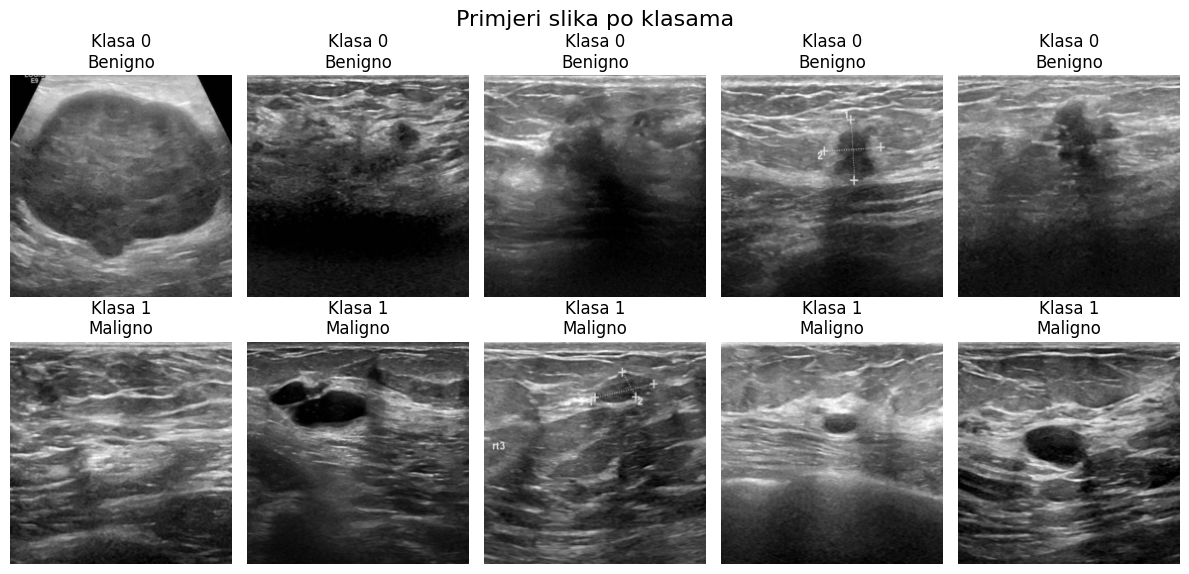

In [ ]:
# Vizualizacija po klasama (5 slika po klasi)

klasa_slika = {k: [] for k in klase}
for i in range(len(x_train)):
    label = int(y_train[i][0])
    if len(klasa_slika[label]) < 5:
        klasa_slika[label].append(x_train[i])

plt.figure(figsize=(12, 3 * len(klase)))
for i, k in enumerate(klase):
    for j in range(len(klasa_slika[k])):
        plt.subplot(len(klase), 5, i * 5 + j + 1)
        plt.imshow(klasa_slika[k][j], cmap='gray')
        plt.title(f"Klasa {k}\n{nazivi_klasa[k]}")
        plt.axis('off')
plt.tight_layout()
plt.suptitle("Primjeri slika po klasama", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 144MB/s]


Epoch 1 | Train Loss: 0.0391, Acc: 70.15% | Val Loss: 0.0602, Acc: 73.08%, AUC: 0.7820
Epoch 2 | Train Loss: 0.0323, Acc: 78.75% | Val Loss: 0.0457, Acc: 71.79%, AUC: 0.7168
Epoch 3 | Train Loss: 0.0275, Acc: 82.05% | Val Loss: 0.0450, Acc: 65.38%, AUC: 0.8312
Epoch 4 | Train Loss: 0.0254, Acc: 83.70% | Val Loss: 0.0478, Acc: 88.46%, AUC: 0.8680
Epoch 5 | Train Loss: 0.0275, Acc: 81.68% | Val Loss: 0.0290, Acc: 80.77%, AUC: 0.8881
Epoch 6 | Train Loss: 0.0279, Acc: 78.57% | Val Loss: 0.0289, Acc: 74.36%, AUC: 0.9014
Epoch 7 | Train Loss: 0.0238, Acc: 83.52% | Val Loss: 0.0243, Acc: 88.46%, AUC: 0.9340
Epoch 8 | Train Loss: 0.0163, Acc: 87.73% | Val Loss: 0.0390, Acc: 67.95%, AUC: 0.8363
Epoch 9 | Train Loss: 0.0306, Acc: 79.30% | Val Loss: 0.0241, Acc: 84.62%, AUC: 0.8972
Epoch 10 | Train Loss: 0.0264, Acc: 79.30% | Val Loss: 0.0253, Acc: 84.62%, AUC: 0.9031
Epoch 11 | Train Loss: 0.0212, Acc: 86.81% | Val Loss: 0.0231, Acc: 84.62%, AUC: 0.9089
Epoch 12 | Train Loss: 0.0189, Acc: 88.46

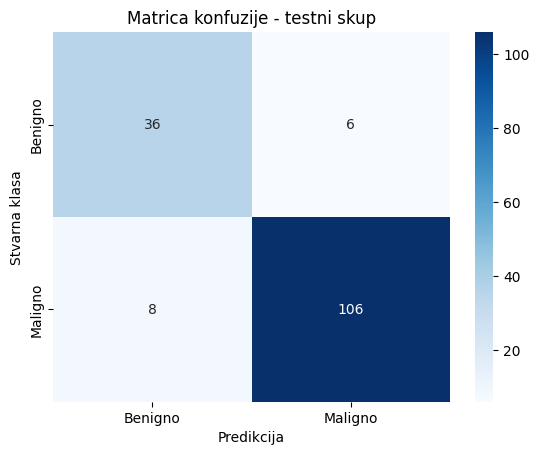

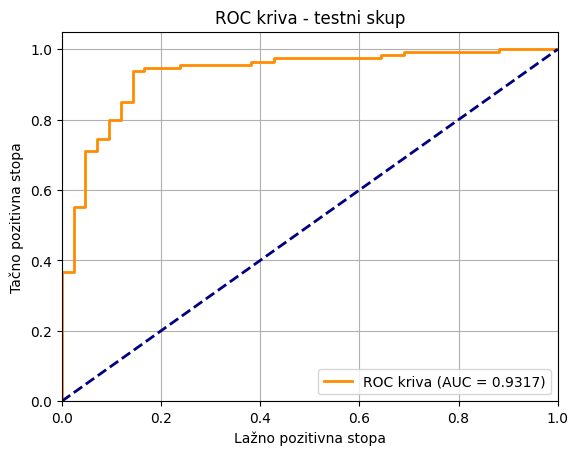

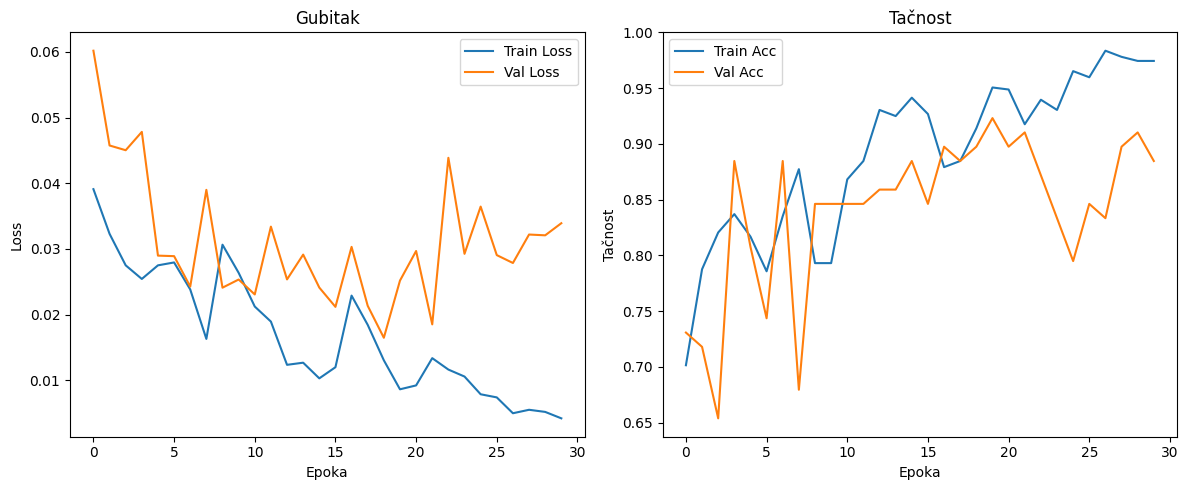

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms, models
from PIL import Image
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import random

# FAZA 3: ANALIZA I PREPROCESIRANJE PODATAKA

# 3.10.1. Inicijalizacija okruženja i osiguravanje ponovljivosti
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 4.4.2. Funkcija gubitka
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.bce = nn.BCEWithLogitsLoss(reduction='none')

    def forward(self, inputs, targets):
        BCE_loss = self.bce(inputs, targets)
        pt = torch.exp(-BCE_loss)
        return (self.alpha * (1 - pt) ** self.gamma * BCE_loss).mean()

# 3.10.3. Strukturiranje podataka pomoću prilagođene Dataset klase (BreastMNISTDataset)
class BreastMNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        img = Image.fromarray((img * 255).astype(np.uint8))
        if self.transform:
            img = self.transform(img)
        return img, label

# Učitavanje podataka
data = np.load('/content/drive/MyDrive/moj vi/breastmnist_224.npz')
x_train, y_train = data['train_images'], data['train_labels']
x_val, y_val = data['val_images'], data['val_labels']
x_test, y_test = data['test_images'], data['test_labels']

# 3.10.2. Inicijalna normalizacija slika
x_train = x_train.astype(np.float32) / 255.0
x_val = x_val.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# 3.10.4. Definisanje i primjena transformacija slika (augmentacija i normalizacija)
mean, std = [0.5], [0.5]
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
transform_val_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# 3.10.5. Kreiranje Dataset i DataLoader objekata uz balansiranje klasa

# Kreiranje Dataset i DataLoader objekata
train_ds = BreastMNISTDataset(x_train, y_train, transform=transform_train)
val_ds = BreastMNISTDataset(x_val, y_val, transform=transform_val_test)
test_ds = BreastMNISTDataset(x_test, y_test, transform=transform_val_test)

#Balansiranje klasa pomoću WeightedRandomSampler-a
weights = 1.0 / np.bincount(y_train.ravel().astype(int))
sample_weights = [weights[int(y)] for y in y_train.ravel()]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

#Finalni DataLoader-i
train_loader = DataLoader(train_ds, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

## FAZA 4: ODABIR, FORMIRANJE, TRENIRANJE I TESTIRANJE MODELA

#4.4.1. Definicija i modifikacija modela ResNet50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(weights='IMAGENET1K_V1')

# Modifikacija za grayscale ulaz i binarni izlaz
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 1)

# Strategija finog podešavanja (unfreezing slojeva)
for param in model.parameters():
    param.requires_grad = False
for layer in [model.layer1, model.layer2, model.layer3, model.layer4, model.fc]:
    for param in layer.parameters():
        param.requires_grad = True

model = model.to(device)

# 4.4.2. Funkcija gubitka, optimizator i raspoređivač stope učenja:
criterion = FocalLoss(alpha=0.25, gamma=2)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=3e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 4.4.3. Petlja treniranja
num_epochs = 30
patience = 10
best_auc = 0
no_improve = 0
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    #Faza treniranja
    model.train()
    total_loss, correct, total = 0, 0, 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device).view(-1)
        optimizer.zero_grad()
        out = model(x).view(-1)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * y.size(0)
        pred = (torch.sigmoid(out) > 0.5).float()
        correct += (pred == y).sum().item()
        total += y.size(0)

    train_losses.append(total_loss / total)
    train_accs.append(correct / total)

    #Faza validacije
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    y_val_true, y_val_prob = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device).view(-1)
            out = model(x).view(-1)
            loss = criterion(out, y)
            val_loss += loss.item() * y.size(0)

            prob = torch.sigmoid(out)
            y_val_true.extend(y.cpu().numpy())
            y_val_prob.extend(prob.cpu().numpy())
            pred = (prob > 0.5).float()
            val_correct += (pred == y).sum().item()
            val_total += y.size(0)

    val_losses.append(val_loss / val_total)
    val_accs.append(val_correct / val_total)
    val_auc = roc_auc_score(y_val_true, y_val_prob)
    scheduler.step(val_losses[-1])

    print(f"Epoch {epoch+1} | Train Loss: {train_losses[-1]:.4f}, Acc: {train_accs[-1]*100:.2f}% | Val Loss: {val_losses[-1]:.4f}, Acc: {val_accs[-1]*100:.2f}%, AUC: {val_auc:.4f}")

    #Čuvanje najboljeg modela
    if val_auc > best_auc:
        best_auc = val_auc
        torch.save(model.state_dict(), "best_resnet50_finetuned.pth")
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print("\u23F9 Early stopping aktiviran.")
            break

# 4.5. Evaluacija

# 4.5.1. Finalne metrike performansi
model.load_state_dict(torch.load("best_resnet50_finetuned.pth"))
model.eval()

x_test = data['test_images'].astype(np.float32) / 255.0
y_test = data['test_labels'].astype(np.int64).ravel()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

#Evaluacija na testnom skupu
y_true, y_pred, y_prob = [], [], []
with torch.no_grad():
    for img, label in zip(x_test, y_test):
        img = Image.fromarray((img * 255).astype(np.uint8))
        img_tensor = transform(img).unsqueeze(0).to(device)
        output = model(img_tensor).view(-1)
        prob = torch.sigmoid(output).item()
        y_prob.append(prob)
        y_true.append(label)

# Određivanje optimalnog praga
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

#Finalne predikcije
for prob in y_prob:
    y_pred.append(int(prob > optimal_threshold))

# Ispis metrika
print("Optimalni prag:", round(optimal_threshold, 4))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1-score:", f1_score(y_true, y_pred))
print("ROC AUC:", roc_auc_score(y_true, y_prob))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Benigno", "Maligno"]))

# 4.5.2 Vizuelna analiza rezultata
# Vizualizacija matrice konfuzije
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Benigno", "Maligno"], yticklabels=["Benigno", "Maligno"])
plt.title("Matrica konfuzije - testni skup")
plt.xlabel("Predikcija")
plt.ylabel("Stvarna klasa")
plt.show()

# Vizualizacija ROC krive
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC kriva (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Lažno pozitivna stopa')
plt.ylabel('Tačno pozitivna stopa')
plt.title('ROC kriva - testni skup')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Vizualizacija krivih gubitka i tačnosti
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoka')
plt.ylabel('Loss')
plt.title('Gubitak')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoka')
plt.ylabel('Tačnost')
plt.title('Tačnost')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image
from torchvision import transforms, models
import torch
import torch.nn as nn

folder_path = '/content/drive/MyDrive/noveSlike'
model_path = '/content/best_resnet50_finetuned.pth'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Optimalni prag iz test skupa
optimal_threshold = 0.6471

# Učitavanje modela
model = models.resnet50(weights='IMAGENET1K_V1')
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Transformacija kao za validaciju/test
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Brojači za tačnost
ukupno = 0
tacno = 0

print("\nKlasifikacija na nepoznatim podacima:\n")

for fname in os.listdir(folder_path):
    if fname.endswith('.png'):
        path = os.path.join(folder_path, fname)
        image = Image.open(path).convert('RGB')
        image = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image).view(-1)
            prob = torch.sigmoid(output).item()
            pred_label = "Benigno" if prob > optimal_threshold else "Maligno"

        # Izvlačenje stvarne klase iz imena fajla
        fname_lower = fname.lower()
        if "malig" in fname_lower:
            stvarna = "Maligno"
        elif "benig" in fname_lower:
            stvarna = "Benigno"
        else:
            stvarna = "Nepoznato"

        # Ispis rezultata
        print(f"{fname}")
        print(f"Vjerovatnoća da je maligno: {prob:.4f}")
        print(f"Klasifikacija modela: {pred_label}")
        print(f"Očekivana klasa: {stvarna}")

        if stvarna != "Nepoznato":
            ukupno += 1
            if stvarna == pred_label:
                tacno += 1
        print()

# Tačnost
if ukupno > 0:
    print(f"Ukupna tačnost na nepoznatim podacima: {tacno}/{ukupno} ({(tacno/ukupno)*100:.2f}%)")
else:
    print("Nije moguće izračunati tačnost (nepoznate stvarne klase).")



Klasifikacija na nepoznatim podacima:

malignant (104).png
   → Vjerovatnoća da je maligno: 0.0501
   → Klasifikacija modela: Maligno
   → Očekivana klasa: Maligno

malignant (100).png
   → Vjerovatnoća da je maligno: 0.0294
   → Klasifikacija modela: Maligno
   → Očekivana klasa: Maligno

benign (00001).png
   → Vjerovatnoća da je maligno: 0.7551
   → Klasifikacija modela: Benigno
   → Očekivana klasa: Benigno

benign (1000).png
   → Vjerovatnoća da je maligno: 0.9236
   → Klasifikacija modela: Benigno
   → Očekivana klasa: Benigno

malignant (1).png
   → Vjerovatnoća da je maligno: 0.4308
   → Klasifikacija modela: Maligno
   → Očekivana klasa: Maligno

normal (10).png
   → Vjerovatnoća da je maligno: 0.8738
   → Klasifikacija modela: Benigno
   → Očekivana klasa: Nepoznato

benign (101).png
   → Vjerovatnoća da je maligno: 0.8744
   → Klasifikacija modela: Benigno
   → Očekivana klasa: Benigno

benign (1).png
   → Vjerovatnoća da je maligno: 0.5302
   → Klasifikacija modela: Malign